Importing the Libraries

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data collection and pre processing

In [37]:
#loading the dataset into pandas dataframe
gold_data = pd.read_csv('/content/gold_price_data.csv')

In [38]:
#printing the 1st five rows of the dataset
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,01/02/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,01/03/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,01/04/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,01/07/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,01/08/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [39]:
#printing the last five rows of dataset
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,05/08/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,05/09/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,05/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [40]:
#number of rows and colums in dataset
gold_data.shape

(2290, 6)

In [41]:
#getting the some basic information about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [42]:
#checking the number of missing values
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [43]:
#getting the statistical measures of dataset
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [44]:
# Convert 'Date' column to datetime objects from data string type#
gold_data['Date'] = pd.to_datetime(gold_data['Date'])

Correlation

positive correlation
negative correlation

In [45]:
correlation = gold_data.corr()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,2008-01-02,1447.160034,84.860001,78.470001,15.180,1.471692
1,2008-01-03,1447.160034,85.570000,78.370003,15.285,1.474491
2,2008-01-04,1411.630005,85.129997,77.309998,15.167,1.475492
3,2008-01-07,1416.180054,84.769997,75.500000,15.053,1.468299
4,2008-01-08,1390.189941,86.779999,76.059998,15.590,1.557099


<Axes: >

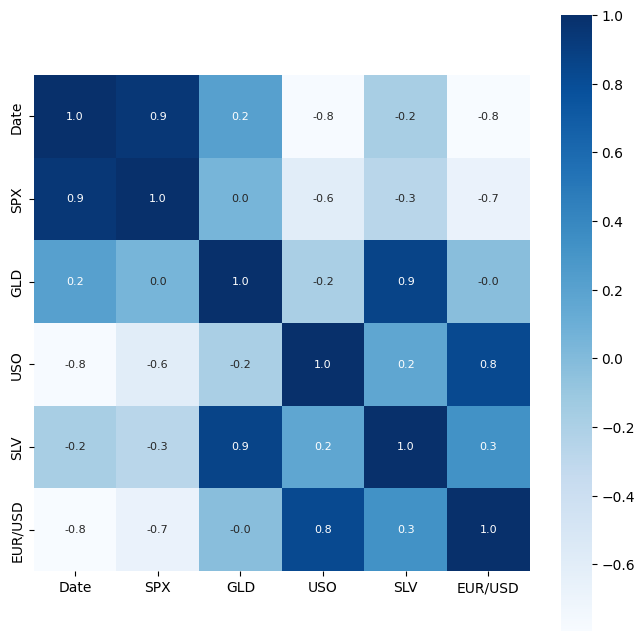

In [46]:
#constructing a heat map to understand the correlation
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar= True, square=True, annot= True, fmt='.1f', annot_kws={'size':8}, cmap='Blues')

In [48]:
#getting the correletion of GLD (gold)
print(correlation['GLD'])

Date       0.209118
SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<Axes: xlabel='GLD', ylabel='Count'>

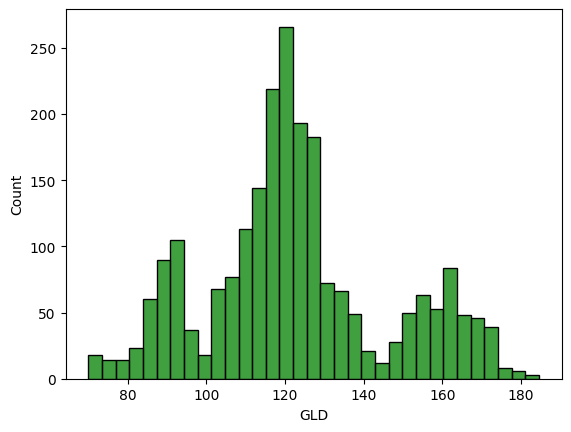

In [53]:
#checking the distribution of the GLD data
sns.histplot(gold_data['GLD'], color='green')

Splitting the features and target

In [55]:
x = gold_data.drop(['GLD', 'Date'], axis=1)
y = gold_data['GLD']

In [56]:
print(x,y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns] 0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


splitting into training and test data

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 2)

model training

Random forest

In [59]:
regressor = RandomForestRegressor(n_estimators=100)

In [60]:
#training the dataset
regressor.fit(x_train, y_train)

RandomForestRegressor()

Model evaluation

In [63]:
#pediction on test data
x_test_prediction = regressor.predict(x_test)

In [65]:
print(x_test_prediction)

[168.31019946  82.19219996 116.08670031 127.59140069 120.67980095
 154.91009823 150.22809939 126.11719992 117.41779869 125.87610115
 116.38840102 171.85700053 141.31129815 167.82349839 115.08419984
 117.61590025 140.58200243 170.25930089 159.50690274 159.49719885
 155.07189965 125.49170055 176.54459984 157.04480304 125.14950048
  93.64789946  76.97989989 120.92289997 119.11949903 167.5149
  88.16650049 125.21580014  90.87840096 117.5552004  121.20219863
 136.36570092 115.5469013  114.99700032 148.12200029 107.24020112
 104.31540223  87.17489801 126.50720074 117.79220022 153.21059843
 119.50800019 108.36459976 108.02269812  93.1042002  127.01729818
  74.77680043 113.62519899 121.2744     111.19249889 118.93769904
 120.98999912 159.30190041 167.54680116 146.92459652  85.64809811
  94.39640008  87.00389932  90.75950003 118.88240097 126.50970034
 127.65400043 169.8582     122.20109915 117.34629895  98.42689991
 168.63830171 143.09669867 132.01780271 121.02350215 121.40579933
 119.71250094 

In [68]:
#R squared value
error_score = metrics.r2_score(y_test, x_test_prediction)
print("R squared error : ",error_score)

R squared error :  0.9886844951538682


comparing the actual values and predicted values in a plot

In [69]:
#converting the y_test into list
y_test = list(y_test)

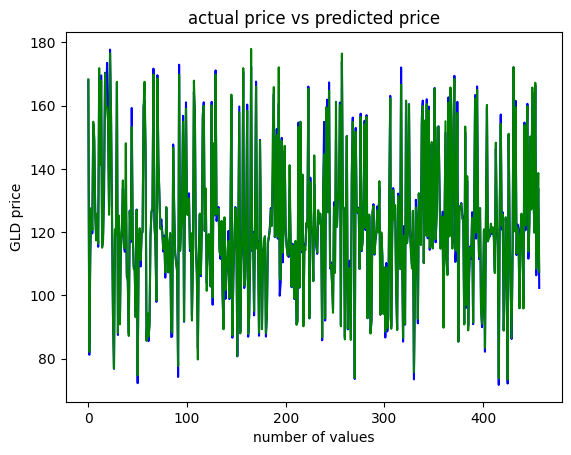

In [70]:
plt.plot(y_test, color='blue', label='Actual Values')
plt.plot(x_test_prediction, color ='green', label ='predicted values')
plt.title('actual price vs predicted price')
plt.xlabel('number of values')
plt.ylabel('GLD price')
plt.show()

Making predictive system

In [72]:
input_data=(1411.630005,77.309998,15.167,1.475492)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)

print("Gold price : ",prediction)

Gold price :  [85.17229805]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
